In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import numpy as np
import math

In [39]:
#Membaca file
df = pd.read_excel('/content/data terbaru coba.. (1).xlsx')
df.head()

,bitcoin
0,582040008
1,568145024
2,551827008
3,570281984
4,584009024


In [40]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

def plot(data):
  data.plot()
  plt.title('Plot Data')
  plt.xlabel('Days')
  plt.tight_layout()
  plt.show()

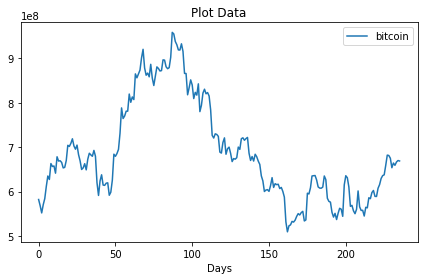

1. ADF :  -1.6424944748690944
2. P-Value :  0.4609576564269116
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 233
5. Critical Values :
	 1% :  -3.458731141928624
	 5% :  -2.8740258764297293
	 10% :  -2.5734243167124093


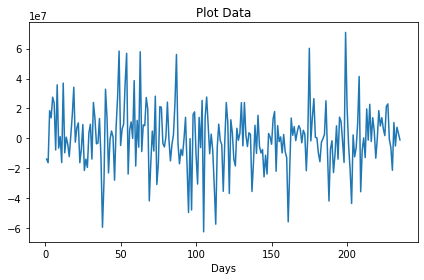

1. ADF :  -11.364742866902565
2. P-Value :  9.286061071954463e-21
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 233
5. Critical Values :
	 1% :  -3.458731141928624
	 5% :  -2.8740258764297293
	 10% :  -2.5734243167124093


In [41]:
#Uji Stasioneritas Data
data_pakai = df['bitcoin']

#Plot Data
plot(df)

stasioner = ad_test(data_pakai)
dftest = adfuller(data_pakai, autolag = 'AIC')
if dftest[1] > 0.05:
  diff = data_pakai.diff()
  plot(diff)
  ad_test(diff[1:])

In [44]:
x_train_asli, x_test_asli = train_test_split(data_pakai,
                                             test_size=0.1,
                                             random_state=None,
                                             shuffle=False)
x_test_asli = x_test_asli.reset_index(drop=True)

x_train, x_test = train_test_split(diff,
                                   test_size=0.1,
                                   random_state=None,
                                   shuffle=False)

#Menampilkan Data
x_train = x_train.dropna().reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
data_training_test = pd.concat([x_train,x_test], axis=1).reset_index(drop=True)
data_training_test.columns = ['data training', 'data testing']
pd.set_option('max_row', None)
display(data_training_test[:len(x_test)])
print('='*100)
print('Banyak Data Train :',len(x_train))
print('='*100)
print('Banyak Data Train :',len(x_test))

,data training,data testing
0,-13894984.0,-12886016.0
1,-16318016.0,19678016.0
2,18454976.0,-1244032.0
3,13727040.0,22743040.0
4,27491008.0,-2104000.0
5,23499968.0,13773952.0
6,-7790016.0,4719040.0
7,35790016.0,-13305024.0
8,-6580032.0,-203008.0
9,1137024.0,18507008.0


Banyak Data Train : 211
Banyak Data Train : 24


In [45]:
absolut = []
for i in range (len(x_train)-1):
  absolut1 = abs(x_train[i+1]-x_train[i])
  absolut.append(absolut1)

rata2_data1=np.mean(absolut)
setengah_rata2_data1=rata2_data1*0.5
max_data1 = x_train.max()
min_data1 = x_train.min()
print('='*100)
print('Rata - rata :',rata2_data1)
print('='*100)
print('Setengah Rata-rata : ',setengah_rata2_data1)
print('='*100)
print('Nilai Max :',max_data1)
print('='*100)
print('Nilai Min :',min_data1)

Rata - rata : 22711783.58095238
Setengah Rata-rata :  11355891.79047619
Nilai Max : 70883008.0
Nilai Min : -62565952.0


In [46]:
#Pembulatan
def pembulatan(x):
  if x >= 0.1 and x <= 1.0:
    f = round(x,1)
    return f
  elif x >= 1.1 and x <= 10:
    f = round(x)
    return f
  elif x >= 10.1 and x <= 100:
    f = x / 10
    f = round(f)*10
    return f
  elif x >= 100.1 and x <= 1000:
    f = x / 100
    f = round(f)*100
    return f
  elif x >= 1000.1 and x <= 10000:
    f = x / 1000
    f = round(f)*1000
    return f
  elif x >= 10000.1 and x <= 100000:
    f = x / 10000
    f = round(f)*10000
    return f
  elif x >= 100000.1 and x <= 1000000:
    f = x / 100000
    f = round(f)*100000
    return f
  elif x >= 1000000.1 and x <= 10000000:
    f = x / 1000000
    f = round(f)*1000000
    return f
  elif x >= 10000000.1 and x <= 100000000:
    f = x / 10000000
    f = round(f)*10000000
    return f
  elif x >= 100000000.1 and x <= 1000000000:
    f = x / 100000000
    f = round(f)*100000000
    return f
  elif x >= 1000000000.1 and x <= 10000000000:
    f = x / 1000000000
    f = round(f)*1000000000
    return f

n = pembulatan(setengah_rata2_data1)
print('panjang interval : ',n)
print('='*100)

panjang interval :  10000000


In [47]:
#Menentukan banyak interval
s = (max_data1 - min_data1) / n
banyak_interval = math.ceil(s)
print('Banyaknya interval: ',banyak_interval)
print('='*100)
print('Interval :')
u=[[math.floor(min_data1+i*n),math.floor(min_data1+(i+1)*n)] for i in range(banyak_interval)]
for i in range(banyak_interval):
  print(f'u{i+1} : {u[i]}')
print('='*100)

Banyaknya interval:  14
Interval :
u1 : [-62565952, -52565952]
u2 : [-52565952, -42565952]
u3 : [-42565952, -32565952]
u4 : [-32565952, -22565952]
u5 : [-22565952, -12565952]
u6 : [-12565952, -2565952]
u7 : [-2565952, 7434048]
u8 : [7434048, 17434048]
u9 : [17434048, 27434048]
u10 : [27434048, 37434048]
u11 : [37434048, 47434048]
u12 : [47434048, 57434048]
u13 : [57434048, 67434048]
u14 : [67434048, 77434048]


In [48]:
#Untuk menentukan nilai tengah dari interval
nilai_tengah = [(math.floor(min_data1+i*n)+math.floor(min_data1+(i+1)*n))/2 for i in range(banyak_interval)]
print('Nilai Tengah: ')
for i in range(banyak_interval):
  print(f'm{i+1} : {nilai_tengah[i]}')
print('='*100)

Nilai Tengah: 
m1 : -57565952.0
m2 : -47565952.0
m3 : -37565952.0
m4 : -27565952.0
m5 : -17565952.0
m6 : -7565952.0
m7 : 2434048.0
m8 : 12434048.0
m9 : 22434048.0
m10 : 32434048.0
m11 : 42434048.0
m12 : 52434048.0
m13 : 62434048.0
m14 : 72434048.0


In [49]:
#Fuzifikasi
def Fuzifikasi(data):
  Fuzi =[]
  NT = []
  for i in range (len(data)):
    for j in range(banyak_interval):
      if u[j][0] <= data[i] <= u[j][1]:
        Fuzi.append(f'A{j+1}')
        NT.append(nilai_tengah[j])
  Fuzifi = pd.DataFrame(Fuzi, columns=['Fuzifikasi'])
  Nilai_T = pd.DataFrame(NT, columns=['Nilai Tengah'])
  dataFuzi = pd.concat([data, Fuzifi, Nilai_T], axis=1)
  return dataFuzi

In [50]:
datafuzifikasi = Fuzifikasi(x_train)
display(datafuzifikasi)

,bitcoin,Fuzifikasi,Nilai Tengah
0,-13894984.0,A5,-17565952.0
1,-16318016.0,A5,-17565952.0
2,18454976.0,A9,22434048.0
3,13727040.0,A8,12434048.0
4,27491008.0,A10,32434048.0
5,23499968.0,A9,22434048.0
6,-7790016.0,A6,-7565952.0
7,35790016.0,A10,32434048.0
8,-6580032.0,A6,-7565952.0
9,1137024.0,A7,2434048.0


In [51]:
#FLR

def nextstage(data):
  global next, curent, nt_flrg
  next = [np.NaN,np.NaN]
  list_next = [np.NaN,np.NaN]
  curent = [np.NaN,np.NaN]
  for i in range(len(data)-2):
    x = data.values[i:i+2]
    y = data.values[i+2]
    list_next.append(f'{x} -> {[y]}')
    next.append(f'{x[0]},{x[1]}')
    curent.append(y)
  return list_next

def NT(data):
  nt = [np.NaN,np.NaN]
  for i in range(len(data)-2):
    x = data.values[i+2]
    nt.append(x)
  return nt

In [52]:
list3_series = pd.DataFrame(nextstage(datafuzifikasi['Fuzifikasi']), columns=['Next Stage'])
list4_series = pd.DataFrame(curent, columns=['Nilai'])
list5_series = pd.DataFrame(next, columns=['Next'])
listnt_series = pd.DataFrame(NT(datafuzifikasi['Nilai Tengah']), columns=['Nilai Tengah'])
df_FLR = pd.concat([datafuzifikasi['Fuzifikasi'], list3_series], axis=1)
df_flr = pd.concat([datafuzifikasi['Fuzifikasi'], list5_series, list4_series, listnt_series], axis=1)
next1 = list5_series.dropna()
next2 = next1.drop_duplicates().reset_index(drop=True)
print('FLR :')
display(df_FLR)
print('='*100)

FLR :


,Fuzifikasi,Next Stage
0,A5,NaN
1,A5,NaN
2,A9,['A5' 'A5'] -> ['A9']
3,A8,['A5' 'A9'] -> ['A8']
4,A10,['A9' 'A8'] -> ['A10']
5,A9,['A8' 'A10'] -> ['A9']
6,A6,['A10' 'A9'] -> ['A6']
7,A10,['A9' 'A6'] -> ['A10']
8,A6,['A6' 'A10'] -> ['A6']
9,A7,['A10' 'A6'] -> ['A7']


In [53]:
#FLRG

df_flr = df_flr.dropna().reset_index(drop=True)
flrg = []
for i in next2.values:
  x = df_flr.Nilai[df_flr.Next == i[0]].values
  flrg.append([x])
list6_series = pd.DataFrame(flrg, columns=['NSFLRG'])
df_flrg = pd.concat([next2, list6_series], axis=1)
display(df_flrg)

,Next,NSFLRG
0,"A5,A5","[A9, A5, A7, A7]"
1,"A5,A9","[A8, A8, A9]"
2,"A9,A8","[A10, A6, A3]"
3,"A8,A10","[A9, A6, A12, A8]"
4,"A10,A9",[A6]
5,"A9,A6","[A10, A6, A4, A9, A3, A5]"
6,"A6,A10","[A6, A4]"
7,"A10,A6","[A7, A7, A7]"
8,"A6,A7","[A5, A6, A8, A8, A8, A9, A9, A8, A6, A7, A6, A7, A7, A4]"
9,"A7,A5","[A10, A6, A5, A7, A14]"


In [54]:
#Defuzzifikasi

flrgnt = []
for i in next2.values:
  x = df_flr['Nilai Tengah'][df_flr.Next == i[0]].values
  flrgnt.append([x])
list7_series = pd.DataFrame(flrgnt, columns=['NTFLRG'])
df_flrgnt = pd.concat([next2, list7_series], axis=1)
pd.set_option('max_colwidth',None)
display(df_flrgnt)

,Next,NTFLRG
0,"A5,A5","[22434048.0, -17565952.0, 2434048.0, 2434048.0]"
1,"A5,A9","[12434048.0, 12434048.0, 22434048.0]"
2,"A9,A8","[32434048.0, -7565952.0, -37565952.0]"
3,"A8,A10","[22434048.0, -7565952.0, 52434048.0, 12434048.0]"
4,"A10,A9",[-7565952.0]
5,"A9,A6","[32434048.0, -7565952.0, -27565952.0, 22434048.0, -37565952.0, -17565952.0]"
6,"A6,A10","[-7565952.0, -27565952.0]"
7,"A10,A6","[2434048.0, 2434048.0, 2434048.0]"
8,"A6,A7","[-17565952.0, -7565952.0, 12434048.0, 12434048.0, 12434048.0, 22434048.0, 22434048.0, 12434048.0, -7565952.0, 2434048.0, -7565952.0, 2434048.0, 2434048.0, -27565952.0]"
9,"A7,A5","[32434048.0, -7565952.0, -17565952.0, 2434048.0, 72434048.0]"


In [55]:
def WFTS(data, c):
  global listll
  listll = []
  matrik = []
  df = Matrix(df_flrgnt.NTFLRG,c)
  for i in data:
    x = 0
    y = 0
    for j in range(len(i[0])):
      x += (pow(c,j)*i[0][j])
      y += pow(c,j)
      z = x/y
    listll.append(z)
  for k in range(len(df)):
    hasil = 0
    for l in df[k]:
      hasil += listll[k] * l
    matrik.append(hasil)
    list11 = pd.DataFrame(matrik, columns=['Peramalan'])
    wfts = pd.concat([next2,list11], axis=1)
  return wfts

def Matrix(data,c):
  x = []
  y = []
  for i in data:
    bawah = 0
    for j in range(len(i)):
      bawah += pow(c,j)
    for k in range(len(i)):
      atas = pow(c,k) / bawah
      x.append(atas)
    z = x.copy()
    y.append(z)
    x.clear()
  return y

def Peramalan_Asli(data1,data2):
  global Peramalan_A
  Peramalan_A = [np.NaN,np.NaN]
  for i in range(len(data1)-3):
    list1 = data1[i+2]+data2[i]
    Peramalan_A.append(list1)
  Peramalanasli = pd.DataFrame(Peramalan_A, columns=['Peramalan Asli'])
  #df = pd.DataFrame(list(zip(data1, Peramalan_A)), columns=['name of issuer', 'cusip'])
  return Peramalanasli

def Peramalan(data1,c):
  global df2
  df1 = WFTS(flrgnt,c)
  df2 = [np.NaN,np.NaN]
  for i in data1:
    for j in range(len(df1)):
      if i == df1.Next[j]:
        df2.append(df1.Peramalan[j])
  df3 = pd.DataFrame(df2, columns=['Hasil Peramalan'])
  return df3

def mape(data1,data2):
  global mape_ygy
  mape_ygy = []
  for i in range(len(data1)):
    mape_ygy.append(abs((data1[i]-data2[i])/data1[i]))
  nilai = sum(mape_ygy)/len(mape_ygy)
  return nilai*100

def Rmse(x,y):
    x, y = np.array(x), np.array(y)
    MSE = np.square(np.subtract(x,y)).mean() 
    return math.sqrt(MSE)
  
def Peramalan_testing(data,c):
  list_test = []
  wfts = WFTS(flrgnt,c)
  for i in data.NextStage.dropna():
    for j in range(len(wfts.Next)):
      if i == wfts.Next[j]:
        list_test.append(wfts.Peramalan[j])

  df = pd.DataFrame(list_test, columns=['Peramalan'])
  df = pd.concat([NS_test.dropna().reset_index(drop=True),df], axis=1)
  return df

def Peramalan_test(data1,data2):
  global Peramalan_A
  Peramalan_A = []
  for i in range(len(data1)-2):
    list1 = data1[i+1]+data2[i]
    Peramalan_A.append(list1)
  Peramalanasli = pd.DataFrame(Peramalan_A, columns=['Peramalan Asli'])
  df = pd.concat([Peramal_test,Peramalanasli],axis=1)
  #df = pd.DataFrame(list(zip(data1, Peramalan_A)), columns=['name of issuer', 'cusip'])
  return df

masukan berapa banyak nilai C :5


MAPE    2.01595
dtype: float64
Data ke 11
Dengan optimasi nilai MAPE diperoleh c:  1.11


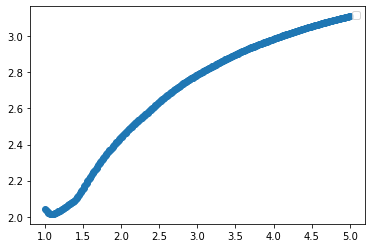

In [56]:
#Mencari nilai C
o = int(input('masukan berapa banyak nilai C :'))
c = [k/100 for k in range(101,(o*100)+1)]
list_RMSE = []
list_MAPE = []
Fuzi_test = Fuzifikasi(x_test)
b = pd.DataFrame(nextstage(Fuzi_test['Fuzifikasi']), columns=['Next'])
nt_test = pd.DataFrame(NT(Fuzi_test['Nilai Tengah']), columns=['Nilai Tengah'])
next = pd.DataFrame(next, columns=['NextStage'])
NS_test = pd.concat([Fuzi_test['bitcoin'], Fuzi_test['Fuzifikasi'], b, nt_test, next], axis=1)

for i in range(len(c)):
  Peramal_test = Peramalan_testing(NS_test,c[i])
  zz2 = Peramalan_test(x_test_asli,Peramal_test['Peramalan'].dropna().reset_index(drop=True))

  list_RMSE.append(Rmse(x_test_asli[2:].reset_index(drop=True),
                        zz2['Peramalan Asli']))
  list_MAPE.append(mape(x_test_asli[2:].reset_index(drop=True),
                        zz2['Peramalan Asli']))

list_RMSE_df = pd.DataFrame(list_RMSE, columns=['RMSE'])
list_MAPE_df = pd.DataFrame(list_MAPE, columns=['MAPE'])


#print(list_RMSE_df.min())
#for i in range (len(list_RMSE)):
  #if list_RMSE_df.min()[0] == list_RMSE[i]:
    #print("Data ke", i+1)
    #print("Dengan optimasi nilai RMSE diperoleh c: ", c[i])

#print('===============================================================')
#plt.scatter(c,list_RMSE_df)
#list_RMSE_df

print(list_MAPE_df.min())
for i in range (len(list_MAPE)):
  if list_MAPE_df.min()[0] == list_MAPE[i]:
    print("Data ke", i+1)
    print("Dengan optimasi nilai MAPE diperoleh c: ", c[i])

print('===============================================================')
plt.scatter(c,list_MAPE_df)
plt.legend()

In [57]:
c = float(input('Masukan nilai C : '))
wfts = WFTS(flrgnt,c)

display(wfts)

Masukan nilai C : 1.11


,Next,Peramalan
0,"A5,A5",1.966930e+06
1,"A5,A9",1.612065e+07
2,"A9,A8",-6.657242e+06
3,"A8,A10",2.030796e+07
4,"A10,A9",-7.565952e+06
5,"A9,A6",-8.324940e+06
6,"A6,A10",-1.808728e+07
7,"A10,A6",2.434048e+06
8,"A6,A7",2.413548e+05
9,"A7,A5",1.857505e+07


Peramalan Data Training :


,bitcoin,Fuzifikasi,Hasil Peramalan,Peramalan Asli
0,-13894984.0,A5,NaN,NaN
1,-16318016.0,A5,NaN,NaN
2,18454976.0,A9,1.966930e+06,5.537939e+08
3,13727040.0,A8,1.612065e+07,5.864026e+08
4,27491008.0,A10,-6.657242e+06,5.773518e+08
5,23499968.0,A9,2.030796e+07,6.318080e+08
6,-7790016.0,A6,-7.565952e+06,6.274340e+08
7,35790016.0,A10,-8.324940e+06,6.188850e+08
8,-6580032.0,A6,-1.808728e+07,6.449127e+08
9,1137024.0,A7,2.434048e+06,6.588540e+08


RMSE Data Training:


17460558.7622221

MAPE Data Training:


1.8399385657655938

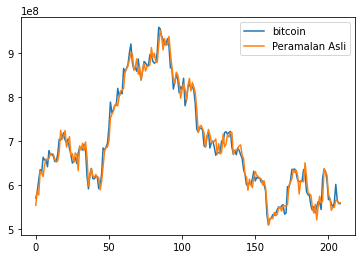

In [58]:
zz1 = Peramalan(df_flr.Next,c)
zz2 = Peramalan_Asli(x_train_asli,zz1['Hasil Peramalan'].dropna().reset_index(drop=True))
zz3 = pd.concat([datafuzifikasi[['bitcoin','Fuzifikasi']],zz1,zz2], axis=1)

print('Peramalan Data Training :')
display(zz3)
print('='*100)
print('RMSE Data Training:')
display(Rmse(x_train_asli[3:].reset_index(drop=True),
             zz3['Peramalan Asli'][2:].reset_index(drop=True)))
print('='*100)
print('MAPE Data Training:')
display(mape(x_train_asli[3:].reset_index(drop=True),
             zz3['Peramalan Asli'][2:].reset_index(drop=True)))
print('='*100)

mm = pd.concat([x_train_asli[3:].reset_index(drop=True),zz3['Peramalan Asli'].dropna().reset_index(drop=True)],axis=1)
mm.plot()

Berapa hari Peramalan (>= 1 hari) : 1
Fuzifikasi Data Testing


,bitcoin,Fuzifikasi
0,-12886016.0,A5
1,19678016.0,A9
2,-1244032.0,A7
3,22743040.0,A9
4,-2104000.0,A7
5,13773952.0,A8
6,4719040.0,A7
7,-13305024.0,A5
8,-203008.0,A7
9,18507008.0,A9



Next Stage Data Testing


,bitcoin,Fuzifikasi,Next
0,-12886016.0,A5,NaN
1,19678016.0,A9,NaN
2,-1244032.0,A7,['A5' 'A9'] -> ['A7']
3,22743040.0,A9,['A9' 'A7'] -> ['A9']
4,-2104000.0,A7,['A7' 'A9'] -> ['A7']
5,13773952.0,A8,['A9' 'A7'] -> ['A8']
6,4719040.0,A7,['A7' 'A8'] -> ['A7']
7,-13305024.0,A5,['A8' 'A7'] -> ['A5']
8,-203008.0,A7,['A7' 'A5'] -> ['A7']
9,18507008.0,A9,['A5' 'A7'] -> ['A9']



Peramalan Data Testing


,bitcoin,Fuzifikasi,Next,Peramalan
0,-1244032.0,A7,['A5' 'A9'] -> ['A7'],1.612065e+07
1,22743040.0,A9,['A9' 'A7'] -> ['A9'],-6.871478e+06
2,-2104000.0,A7,['A7' 'A9'] -> ['A7'],1.548243e+07
3,13773952.0,A8,['A9' 'A7'] -> ['A8'],-6.871478e+06
4,4719040.0,A7,['A7' 'A8'] -> ['A7'],5.016411e+06
5,-13305024.0,A5,['A8' 'A7'] -> ['A5'],-1.005294e+06
6,-203008.0,A7,['A7' 'A5'] -> ['A7'],1.857505e+07
7,18507008.0,A9,['A5' 'A7'] -> ['A9'],1.962354e+07
8,8220992.0,A8,['A7' 'A9'] -> ['A8'],1.548243e+07
9,13809024.0,A8,['A9' 'A8'] -> ['A8'],-6.657242e+06



Peramalan Asli Data Testing


,bitcoin,Fuzifikasi,Next,Peramalan,Peramalan Asli
0,-1244032.0,A7,['A5' 'A9'] -> ['A7'],1.612065e+07,5.806227e+08
1,22743040.0,A9,['A9' 'A7'] -> ['A9'],-6.871478e+06,5.563865e+08
2,-2104000.0,A7,['A7' 'A9'] -> ['A7'],1.548243e+07,6.014835e+08
3,13773952.0,A8,['A9' 'A7'] -> ['A8'],-6.871478e+06,5.770255e+08
4,4719040.0,A7,['A7' 'A8'] -> ['A7'],5.016411e+06,6.026874e+08
5,-13305024.0,A5,['A8' 'A7'] -> ['A5'],-1.005294e+06,6.013847e+08
6,-203008.0,A7,['A7' 'A5'] -> ['A7'],1.857505e+07,6.076600e+08
7,18507008.0,A9,['A5' 'A7'] -> ['A9'],1.962354e+07,6.085055e+08
8,8220992.0,A8,['A7' 'A9'] -> ['A8'],1.548243e+07,6.228714e+08
9,13809024.0,A8,['A9' 'A8'] -> ['A8'],-6.657242e+06,6.089527e+08



RMSE : 
50989211.0712174
MAPE :
2.0159504727554656



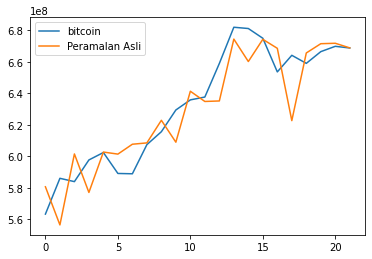

In [77]:
iterasi = int(input("Berapa hari Peramalan (>= 1 hari) : "))
for iterasi_ke in range(0,iterasi):
  if iterasi_ke == 0:
    data_test = x_test
    data_test_asli = x_test_asli
  else:
    data_test = data_test.bitcoin
    data_test_asli = data_test_asli.bitcoin

  #Fuzifikasi Data Testing
  Fuzi_test = Fuzifikasi(data_test)

  #Next Stage Data Testing
  b = pd.DataFrame(nextstage(Fuzi_test['Fuzifikasi']), columns=['Next'])
  nt_test = pd.DataFrame(NT(Fuzi_test['Nilai Tengah']), columns=['Nilai Tengah'])
  next = pd.DataFrame(next, columns=['NextStage'])
  NS_test = pd.concat([Fuzi_test['bitcoin'], Fuzi_test['Fuzifikasi'], b, nt_test, next], axis=1)

  #Peramalan Data Testing
  Peramal_test = Peramalan_testing(NS_test,c)

  #Peramalan Asli Data Testing
  PA = Peramalan_test(data_test_asli,Peramal_test.Peramalan)

  data1 = data_test_asli.copy().to_list()
  data1.append(PA['Peramalan Asli'].iloc[-1])
  data_test_asli = pd.DataFrame(data1, columns=['bitcoin'])
  data2 = data_test.copy().to_list()
  data2.append(PA['Peramalan'].iloc[-1])
  data_test = pd.DataFrame(data2, columns=['bitcoin'])

#Menampilkan Fuzifikasi Data Testing
print('='*100)
print('Fuzifikasi Data Testing')
print('='*100)
display(Fuzi_test[['bitcoin','Fuzifikasi']])
print()

#Meampilkan Next Stage Data Testing
print('='*100)
print('Next Stage Data Testing')
print('='*100)
display(NS_test[['bitcoin','Fuzifikasi','Next']])
print()

#Menampilkan Peramalan Data Testing
print('='*100)
print('Peramalan Data Testing')
print('='*100)
display(Peramal_test[['bitcoin','Fuzifikasi','Next','Peramalan']])
print()

#Menampilkan Peramalan Asli Data Testing
print('='*100)
print('Peramalan Asli Data Testing')
print('='*100)
display(PA[['bitcoin','Fuzifikasi','Next','Peramalan','Peramalan Asli']])
print()

#Menampilkan Mape dan RMSE
print('='*100)
print('RMSE : ')
print(Rmse(data_test_asli[2:].reset_index(drop=True),
           PA['Peramalan Asli']))
print('='*100)
print('MAPE :')
MAPE = mape(data_test_asli['bitcoin'][2:-1].reset_index(drop=True),PA['Peramalan Asli'])
print(MAPE)#f'{round(MAPE,3)}%')
print('='*100)
print()

plot = pd.concat([data_test_asli['bitcoin'][2:-1].reset_index(drop=True),PA['Peramalan Asli']], axis=1)
plot.plot()

(70000000.0, 688280674.7232698)

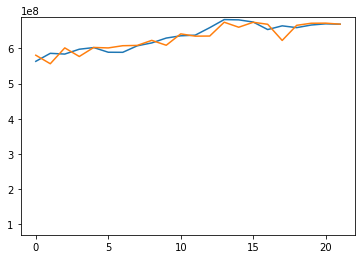

In [78]:
plot = pd.concat([data_test_asli[2:-1].reset_index(drop=True),PA['Peramalan Asli']], axis=1)
plt.plot(plot)
plt.ylim(70000000)